In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import requests 

In [2]:
census_api_key = '<ff9ebd527fe582f1ec69f3b64b00a0b7c39ea504>'
rapid_api_key = '<ff9ebd527fe582f1ec69f3b64b00a0b7c39ea504>'

In [3]:
#total population
variable = 'BO1001_001E' 
#latest census survey
year = '2020'

In [4]:
url = 'https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=us:*&key=ff9ebd527fe582f1ec69f3b64b00a0b7c39ea504'\
.format(year, variable, census_api_key)

In [5]:
#request data
response=requests.request("GET", url)

In [6]:
#response code
response.status_code

200

In [7]:
response.text

'[["NAME","B01001_001E","us"],\n["United States","326569308","1"]]'

In [8]:
response.json()

[['NAME', 'B01001_001E', 'us'], ['United States', '326569308', '1']]

In [9]:
#read population data as a dataframe
df_national = pd.DataFrame(response.json()[1:], columns=response.json()[0])

In [10]:
df_national

,NAME,B01001_001E,us
0,United States,326569308,1


In [11]:
#rename columns 
df_national = df_national.rename(columns = {'B01001_001E': 'total population'})

In [12]:
df_national

,NAME,total population,us
0,United States,326569308,1


In [13]:
# data by state
url = 'https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=state:*&key=ff9ebd527fe582f1ec69f3b64b00a0b7c39ea504'\
.format (year, variable, census_api_key)
response=requests.request("GET", url)
response.status_code


200

In [14]:
df_state = pd.DataFrame(response.json()[1:], columns=response.json()[0])\
.rename(columns={'B01001_OOE': 'total population'})
print('Num of rows:', len(df_state))

Num of rows: 52


In [15]:
df_state.head(52)

,NAME,B01001_001E,state
0,Pennsylvania,12794885,42
1,California,39346023,06
2,West Virginia,1807426,54
3,Utah,3151239,49
4,New York,19514849,36
5,District of Columbia,701974,11
6,Alaska,736990,02
7,Florida,21216924,12
8,South Carolina,5091517,45
9,North Dakota,760394,38


In [16]:
#data by metro
url1 = 'https://api.census.gov/data/{0}/acs/acs5?get=NAME,{1}&'\
.format(year, variable)
url2 = 'for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*&ff9ebd527fe582f1ec69f3b64b00a0b7c39ea504'\
.format(census_api_key)

In [17]:
url = url1 + url2

In [18]:
response=requests.request("GET", url)

In [19]:
response.status_code

400

In [20]:
#read population data
df_metro = pd.DataFrame(response.json()[1:], columns=response.json()[0])\
.rename(columns={'B01001_001E': 'total population'})
print('Num of rows:', len(df_metro))
df_metro.head()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [21]:
# for county
url = 'https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=county:*&in=state:*&key=ff9ebd527fe582f1ec69f3b64b00a0b7c39ea504'\
.format(year, variable, census_api_key)
response=requests.request("GET", url) 
response.status_code

200

In [23]:
df_county = pd.DataFrame(response.json()[1:], columns=response.json()[0])\
.rename(columns={'B01001_001E': 'total population'})
print('Num of rows:', len(df_county))
df_county.head()

Num of rows: 3221


,NAME,total population,state,county
0,"Autauga County, Alabama",55639,01,001
1,"Baldwin County, Alabama",218289,01,003
2,"Barbour County, Alabama",25026,01,005
3,"Bibb County, Alabama",22374,01,007
4,"Blount County, Alabama",57755,01,009


In [30]:
county_name='Kern County, California'

In [32]:
df_county[df_county.NAME == 'Kern County, California'].head()

,NAME,total population,state,county
236,"Kern County, California",892458,06,029


Now that I can confirm that the total population, data on Kern County is available, I want to see how the population has changed over time. 

In [42]:
#list of years for Census API
year_list=['2014','2015','2016','2017','2019','2020']

In [80]:
df_list=[]
for year in year_list:
    #get total population by county
    url = 'https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=tract:*&in=state:06&in=county:*&key=ff9ebd527fe582f1ec69f3b64b00a0b7c39ea504'\
    .format(year, variable, census_api_key)
    response=requests.request("GET", url)
    _df=pd.DataFrame(response.json()[1:], columns=response.json()[0])
    _df['year']=year
    df_list.append(_df)

In [81]:
df_census=pd.concat(df_list)\
.rename(columns={'B01001_001E': 'total population'})
df_census['total population']=df_census['total population'].astype(int)
print('Num of rows:', len(df_census))
df_census.head()

Num of rows: 54774


,NAME,total population,state,county,tract,year
0,"Census Tract 3131.02, Contra Costa County, Cal...",4367,06,013,313102,2014
1,"Census Tract 3131.04, Contra Costa County, Cal...",2740,06,013,313104,2014
2,"Census Tract 3131.05, Contra Costa County, Cal...",4701,06,013,313105,2014
3,"Census Tract 3131.06, Contra Costa County, Cal...",6689,06,013,313106,2014
4,"Census Tract 3131.07, Contra Costa County, Cal...",2656,06,013,313107,2014


In [92]:
df_census['county'] = df_census['NAME'].str[-23:]

In [93]:
df_census.head()

,NAME,total population,state,county,tract,year
0,"Census Tract 3131.02, Contra Costa County, Cal...",4367,06,"osta County, California",313102,2014
1,"Census Tract 3131.04, Contra Costa County, Cal...",2740,06,"osta County, California",313104,2014
2,"Census Tract 3131.05, Contra Costa County, Cal...",4701,06,"osta County, California",313105,2014
3,"Census Tract 3131.06, Contra Costa County, Cal...",6689,06,"osta County, California",313106,2014
4,"Census Tract 3131.07, Contra Costa County, Cal...",2656,06,"osta County, California",313107,2014


In [94]:
df_census[df_census.county == 'Kern County, California'].head()

,NAME,total population,state,county,tract,year
43,"Census Tract 35, Kern County, California",8222,06,"Kern County, California",003500,2014
44,"Census Tract 36, Kern County, California",3847,06,"Kern County, California",003600,2014
45,"Census Tract 38.06, Kern County, California",5075,06,"Kern County, California",003806,2014
46,"Census Tract 38.07, Kern County, California",3619,06,"Kern County, California",003807,2014
47,"Census Tract 38.08, Kern County, California",4672,06,"Kern County, California",003808,2014


In [95]:
#filter on Kern County
county_name='Kern County, California'
df_census_county=df_census.loc[df_census['county']==county_name]
df_census_county

,NAME,total population,state,county,tract,year
43,"Census Tract 35, Kern County, California",8222,06,"Kern County, California",003500,2014
44,"Census Tract 36, Kern County, California",3847,06,"Kern County, California",003600,2014
45,"Census Tract 38.06, Kern County, California",5075,06,"Kern County, California",003806,2014
46,"Census Tract 38.07, Kern County, California",3619,06,"Kern County, California",003807,2014
47,"Census Tract 38.08, Kern County, California",4672,06,"Kern County, California",003808,2014
...,...,...,...,...,...,...
8642,"Census Tract 33.04, Kern County, California",2871,06,"Kern County, California",003304,2020
8643,"Census Tract 33.05, Kern County, California",3854,06,"Kern County, California",003305,2020
8644,"Census Tract 33.07, Kern County, California",2131,06,"Kern County, California",003307,2020
8645,"Census Tract 33.08, Kern County, California",2540,06,"Kern County, California",003308,2020


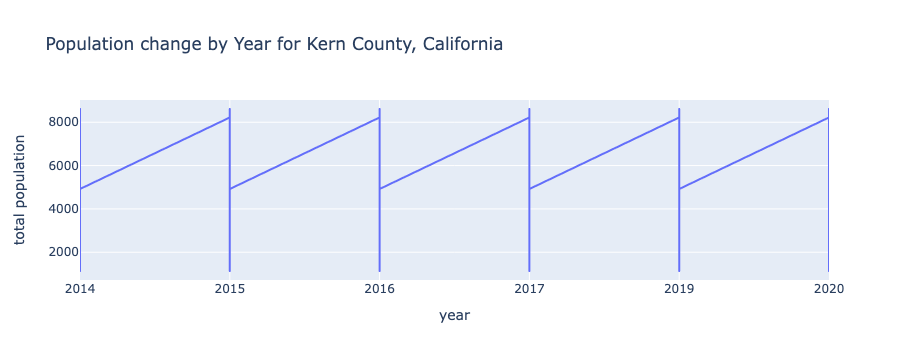

In [98]:
fig=px.line(
    df_census_county,
    x='year', y='total population',
    title='Population change by Year for {}'.format(county_name))
fig.show()